In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import chardet
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
with open('C:/Users/MZ02-JULEE/Downloads/googleplaystore.csv', 'rb') as f:
    result = chardet.detect(f.read())  # detect encoding

# read file
df = pd.read_csv('C:/Users/MZ02-JULEE/Downloads/googleplaystore.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9146 non-null   object 
 1   Category        9146 non-null   object 
 2   Rating          7730 non-null   float64
 3   Reviews         9146 non-null   int64  
 4   Size            9146 non-null   object 
 5   Installs        9146 non-null   object 
 6   Type            9146 non-null   object 
 7   Price           9146 non-null   object 
 8   Content Rating  9146 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9146 non-null   object 
 11  Current Ver     9138 non-null   object 
 12  Android Ver     9144 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 929.0+ KB


In [4]:
df.shape

(9146, 13)

In [3]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature'{col_name}'has {unique_cat} unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature'App'has 8434 unique categories
Feature'Category'has 33 unique categories
Feature'Size'has 460 unique categories
Feature'Installs'has 21 unique categories
Feature'Type'has 2 unique categories
Feature'Price'has 87 unique categories
Feature'Content Rating'has 6 unique categories
Feature'Genres'has 117 unique categories
Feature'Last Updated'has 1358 unique categories
Feature'Current Ver'has 2666 unique categories
Feature'Android Ver'has 34 unique categories


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
# Removing duplicates based on the most recent updates to the app
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df_sorted = df.sort_values('Last Updated', ascending=False)

unique_df = df_sorted.drop_duplicates(['App'])
unique_df.head()

C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\3973793212.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Updated'] = pd.to_datetime(df['Last Updated'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2359,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
4371,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,"50,000+",Free,0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
3694,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,"50,000,000+",Free,0,Teen,Action,2018-08-08,1.1.2,4.1 and up
1486,BankNordik,FINANCE,3.9,28,15M,"5,000+",Free,0,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
7516,Amino: Communities and Chats,SOCIAL,4.8,1264084,62M,"10,000,000+",Free,0,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up


In [5]:
# find missing values
unique_df.isnull().sum()

App                  0
Category             0
Rating            1405
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
unique_df["Content Rating"].value_counts().sort_values(ascending=False)

Content Rating
Everyone           6920
Teen                898
Mature 17+          339
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: count, dtype: int64

In [10]:
df[df['Genres'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4000,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up


In [11]:
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
530,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
1310,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
2544,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
2970,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,2016-11-06,NaN,1.6 and up
3090,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
7586,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up
7781,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
8448,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,2017-05-10,NaN,4.0 and up


In [12]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
591,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,2018-07-20,4.4,NaN
2185,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,2018-03-27,1.1,NaN


In [13]:
df[df['Genres'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4000,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up


In [12]:
df['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

In [13]:
df['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In [14]:
# Data Cleansing
unique_df['Rating'].fillna(unique_df['Rating'].mean(), inplace=True)
unique_df['Genres'].fillna(value='Photography', inplace=True)
unique_df['Installs'].replace(to_replace=['0+', 'Free', '0', 'nan'], value='0', inplace=True)
unique_df['Type'].replace(to_replace=['0'], value='Free', inplace=True)
unique_df['Content Rating'].replace(to_replace=['Everyone 10+', 'Unrated', np.nan], value='Everyone', inplace=True)
unique_df['Content Rating'].replace(to_replace=['Mature 17+'], value='Adults only', inplace=True)
unique_df['Content Rating'].replace(to_replace=['Adults only 18+'], value='Adults only', inplace=True)
unique_df['Android Ver'].replace(to_replace=np.nan, value='Varies with device', inplace=True)


C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11816\1469239027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Rating'].fillna(unique_df['Rating'].mean(), inplace=True)
C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11816\1469239027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Genres'].fillna(value='Photography', inplace=True)
C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11816\1469239027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [15]:
unique_df["Content Rating"].value_counts().sort_values(ascending=False)

Content Rating
Everyone       7195
Teen            898
Adults only     341
Name: count, dtype: int64

In [6]:
# 'Installs' data cleansing
def clean_installs(value):
    # convert non-string values to strings
    str_value = str(value)
    # remove ,.?
    cleaned_value = str_value.replace(',', '').replace(".", '').replace("+", '').replace('"', '')
    # replace to 0
    if cleaned_value.lower() == 'nan':
        cleaned_value = '0'
    # converting the result to an integer
    return int(cleaned_value)

# applying the clean_installs function to each value in the 'Installs' column
unique_df['Installs'] = unique_df['Installs'].apply(clean_installs)

C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\1957183690.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Installs'] = unique_df['Installs'].apply(clean_installs)


In [7]:
unique_df['Type'] = unique_df['Type'].replace({'Free': 0, 'Paid': 1})

C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\1416930525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Type'] = unique_df['Type'].replace({'Free': 0, 'Paid': 1})


In [8]:
print(unique_df['Type'].value_counts().sort_values(ascending=False))

Type
0    7750
1     684
Name: count, dtype: int64


In [9]:
unique_df['Price'] = unique_df['Price'].str.replace('$', '', regex=False)
unique_df['Price'] = unique_df['Price'].astype(float)

C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\2668181005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Price'] = unique_df['Price'].str.replace('$', '', regex=False)
C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\2668181005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Price'] = unique_df['Price'].astype(float)


In [10]:
print(unique_df['Price'].value_counts().sort_values(ascending=False))

Price
0.00     7750
0.99      142
2.99      110
1.99       66
4.99       63
         ... 
2.56        1
3.88        1
1.04        1
89.99       1
1.26        1
Name: count, Length: 87, dtype: int64


In [11]:
print(unique_df['Content Rating'].value_counts().sort_values(ascending=False))

Content Rating
Everyone           6920
Teen                898
Mature 17+          339
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: count, dtype: int64


In [12]:
def convert_size(size):
    if 'M' in size:
        # 'M'을 제거하고 실수로 변환
        return float(size.replace('M', ''))
    elif 'k' in size:
        # 'k'를 제거하고, KB를 MB로 변환하기 위해 1024로 나눔
        return float(size.replace('k', '')) / 1024
    else:
        # 'Varies with device'나 NaN 값 등 처리
        return None

# 'Size' 컬럼의 모든 값을 MB 단위로 변환
unique_df['Size'] = unique_df['Size'].apply(convert_size)

C:\Users\MZ02-JULEE\AppData\Local\Temp\ipykernel_11656\2472878644.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['Size'] = unique_df['Size'].apply(convert_size)


In [23]:
unique_df['Size'].max()

100.0

In [24]:
unique_df[unique_df['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
cleaned_df = unique_df.drop(['Current Ver', 'Android Ver', 'Genres','App'], axis=1)

C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

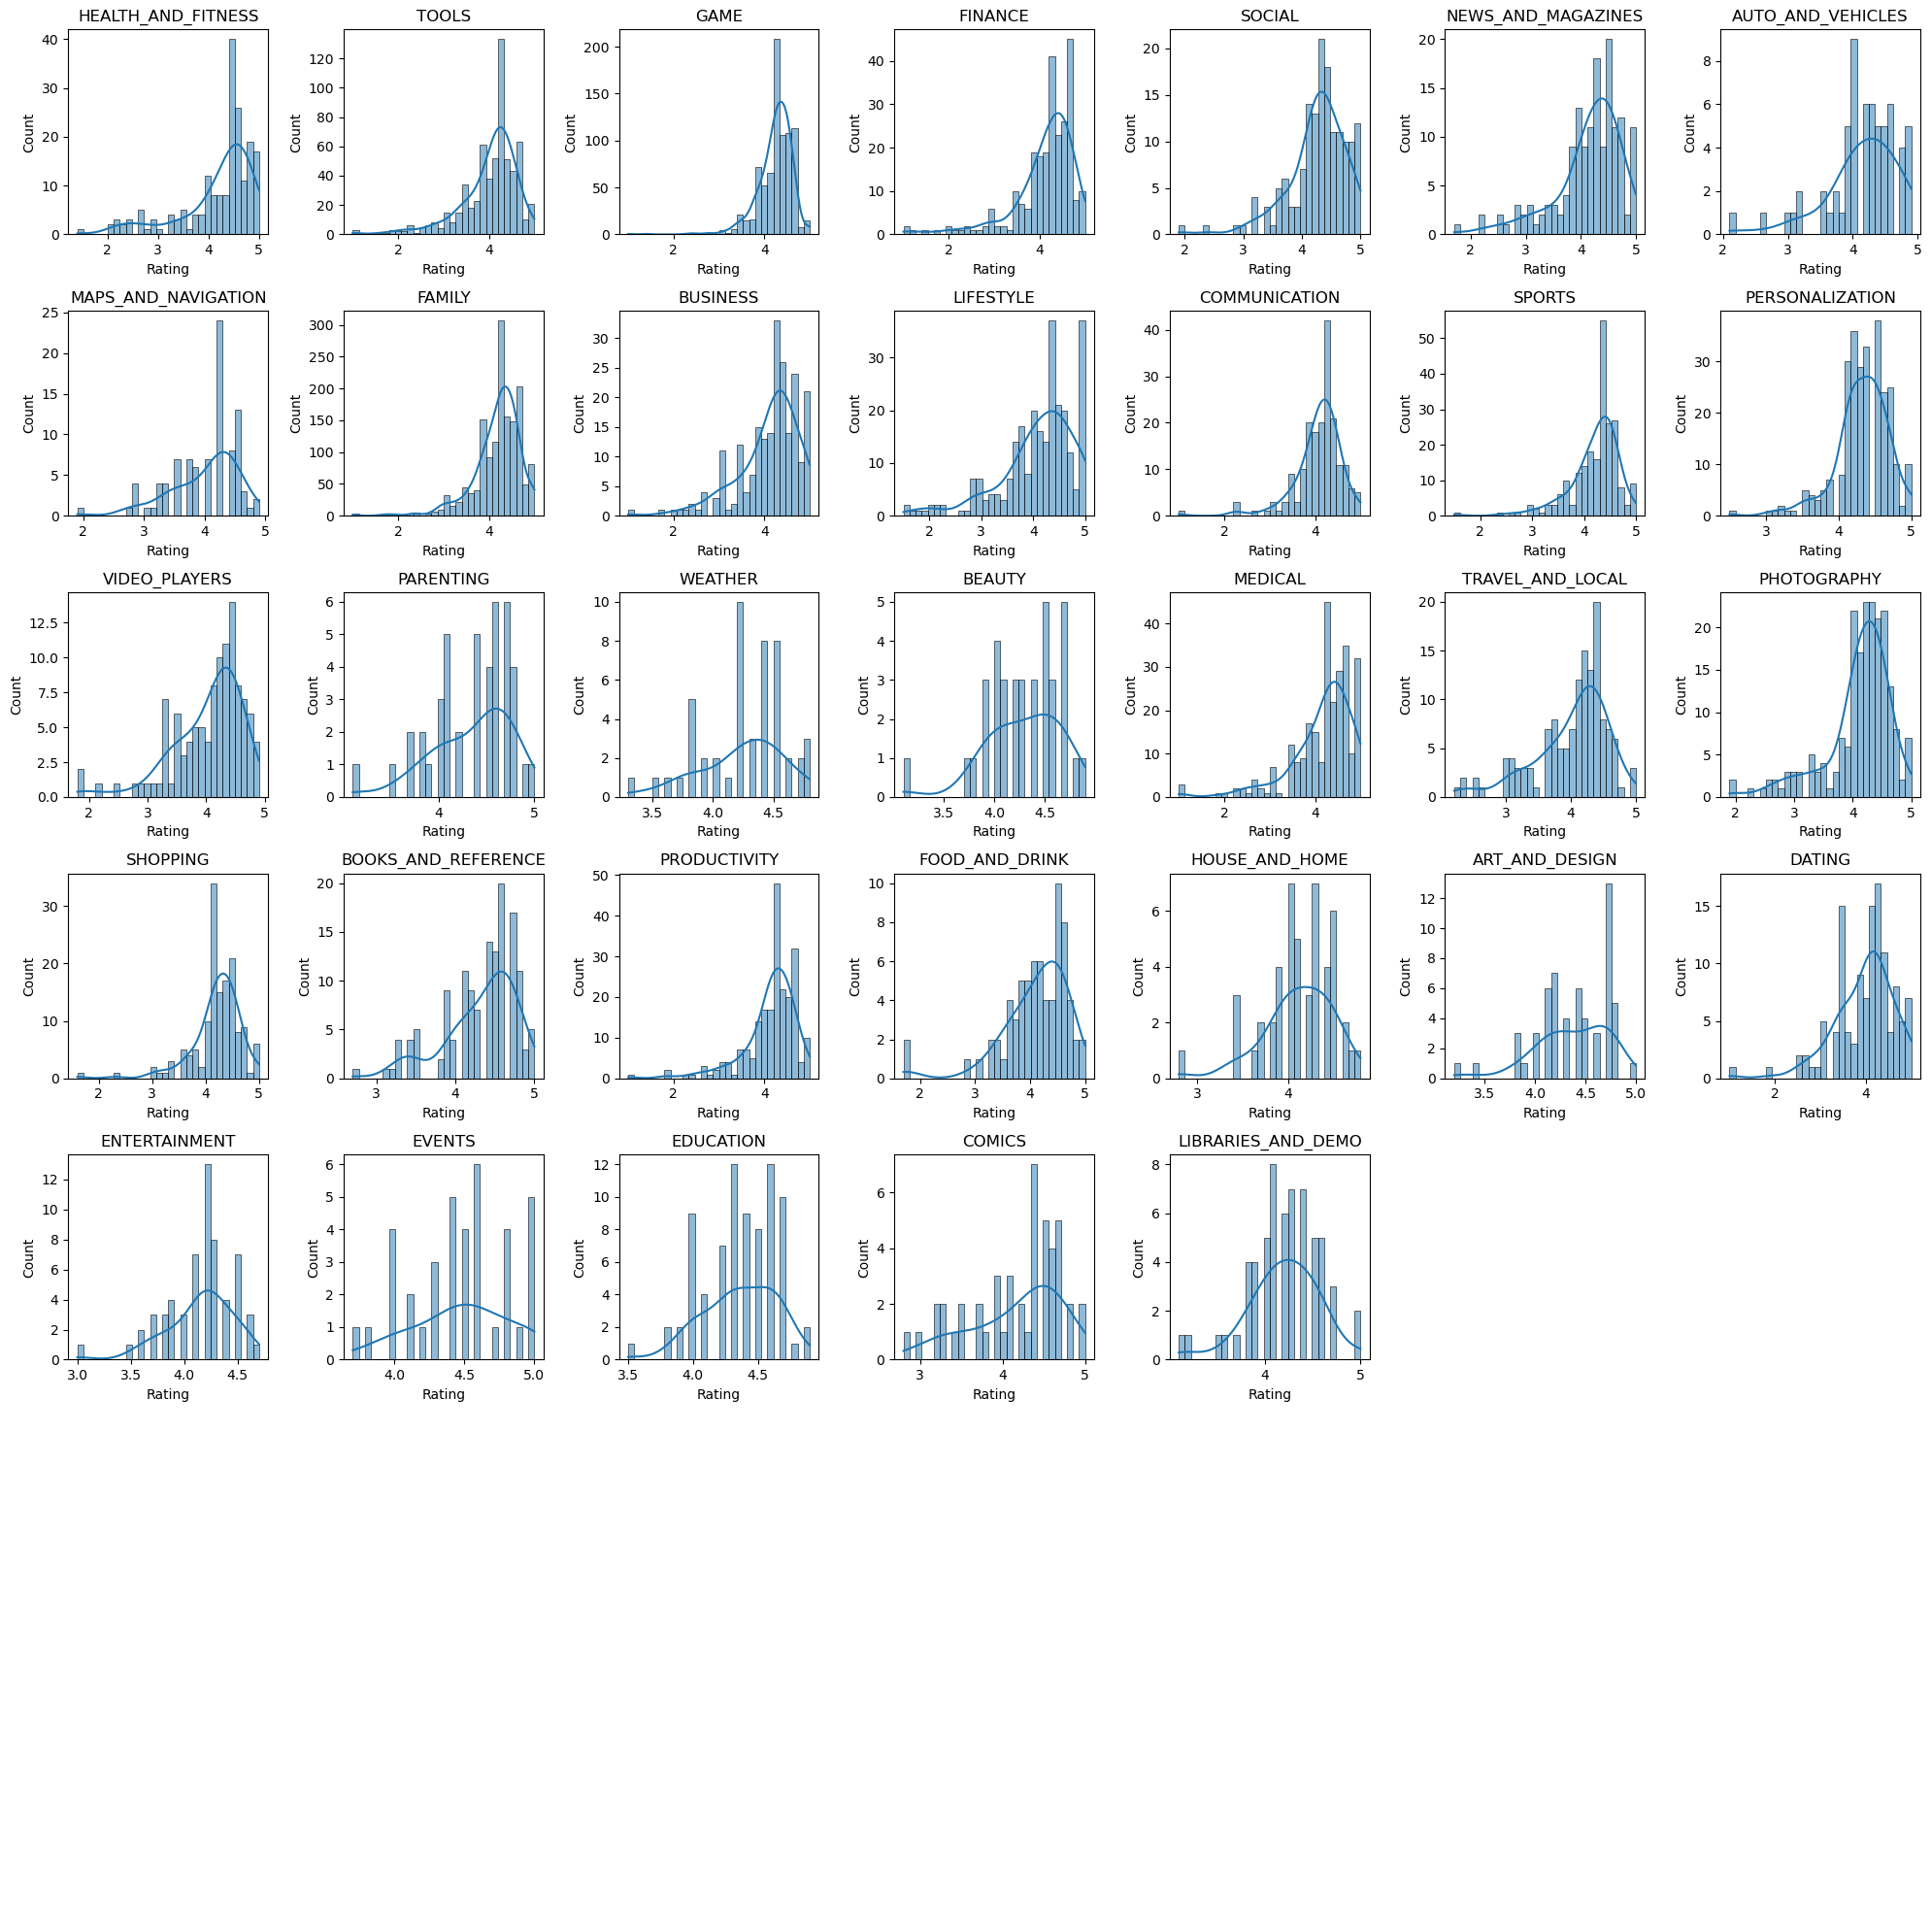

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating multi-charts by category
categories = unique_df['Category'].unique()
num_categories = len(categories)


num_rows = 7
num_cols = 7

# size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# drawing histograms on subplots for each category
for i, category in enumerate(categories):
    # extracting size data for the specific category
    size_data = unique_df[unique_df['Category'] == category]['Rating']
    

    row = i // num_cols
    col = i % num_cols
    sns.histplot(ax=axs[row, col], data=size_data, kde=True, bins=30)
    axs[row, col].set_title(category)
    axs[row, col].set_xlabel('Rating')
    axs[row, col].set_ylabel('Count')


for i in range(len(categories), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

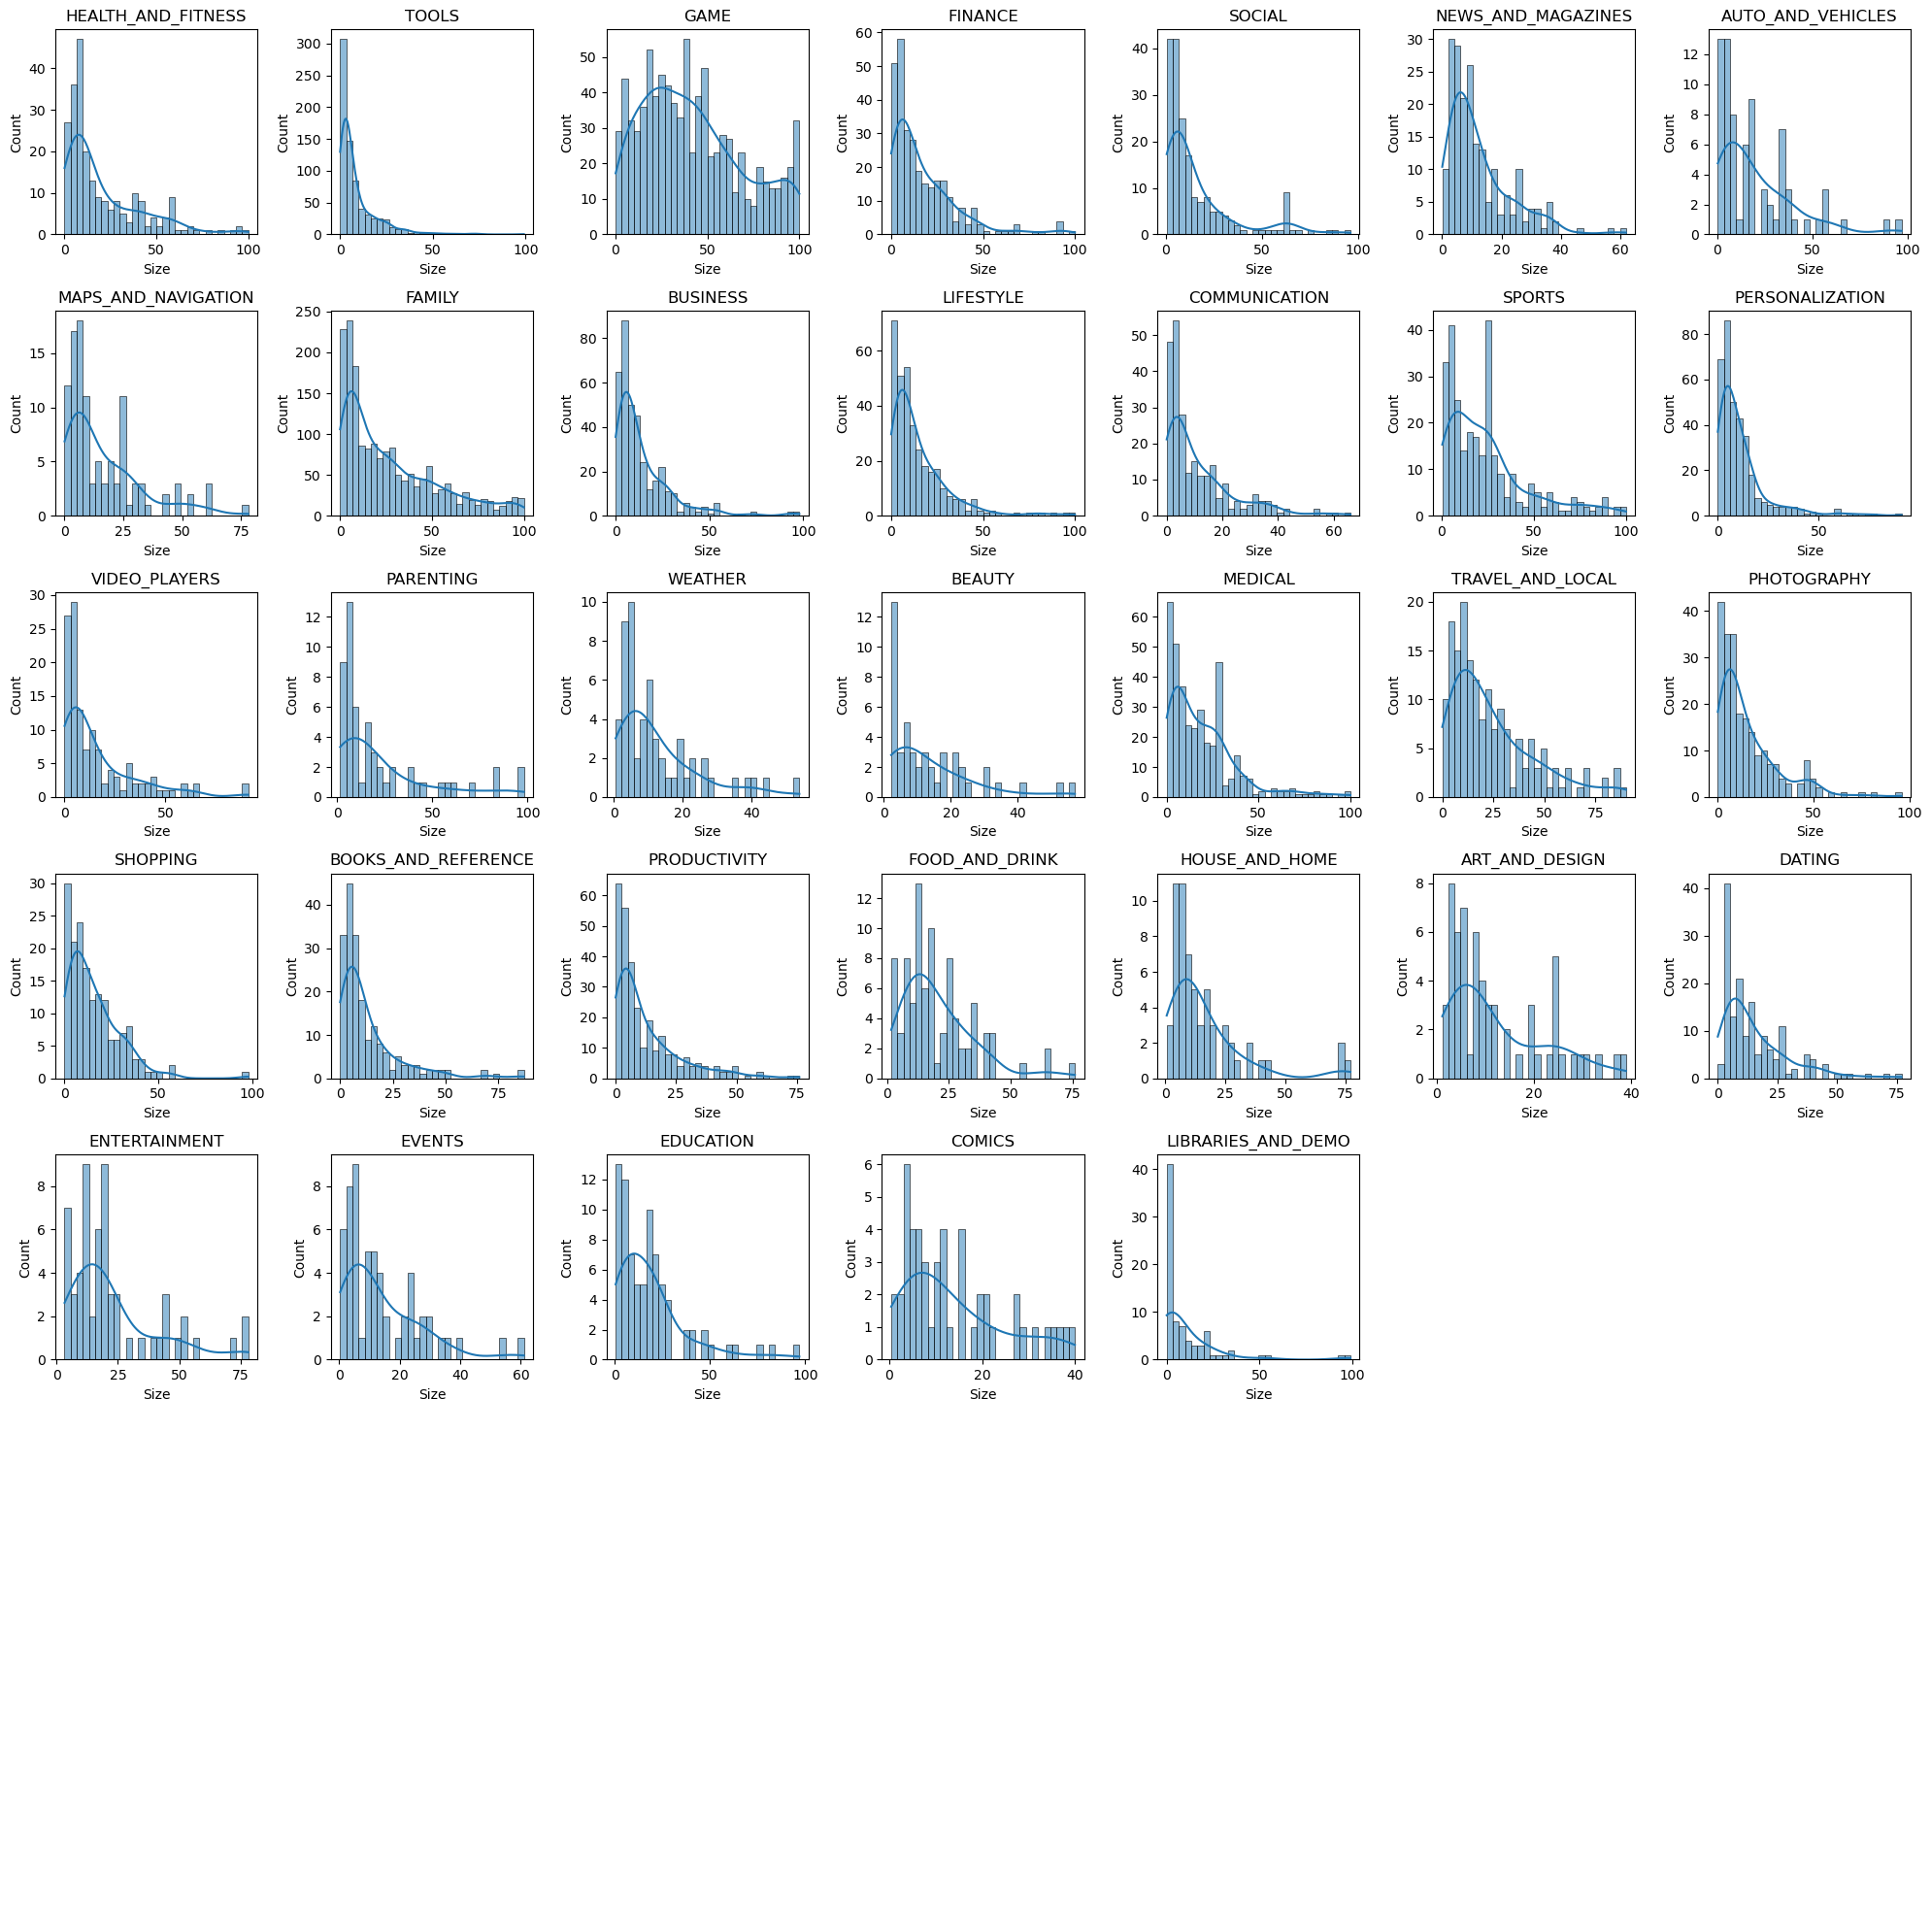

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 카테고리별로 멀티 차트 생성
categories = unique_df['Category'].unique()
num_categories = len(categories)

# 그래프의 가로와 세로 개수 설정
num_rows = 7
num_cols = 7

# 그래프의 전체 크기 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# 각 카테고리별로 하위 그래프에 히스토그램 그리기
for i, category in enumerate(categories):
    # 해당 카테고리의 사이즈 데이터 추출
    size_data = unique_df[unique_df['Category'] == category]['Size']
    
    # 해당 카테고리의 히스토그램 그리기
    row = i // num_cols
    col = i % num_cols
    sns.histplot(ax=axs[row, col], data=size_data, kde=True, bins=30)
    axs[row, col].set_title(category)
    axs[row, col].set_xlabel('Size')
    axs[row, col].set_ylabel('Count')

# 나머지 서브플롯 비우기
for i in range(len(categories), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [19]:
reference_date = df['Last Updated'].max()
cleaned_df['Days Since Last Update'] = (reference_date - cleaned_df['Last Updated']).dt.days
com_df = cleaned_df.drop(['Last Updated','Content Rating'], axis=1)

In [20]:
cleaned_df = unique_df.drop(['Current Ver', 'Android Ver', 'Genres','App'], axis=1)

In [22]:
# Defining a function to remove outliers and delete rows with NaN values.
def remove_outliers_and_nan(com_df, columns):
    
    outliers_indices = set()
    for column in columns:
        q1 = com_df[column].quantile(0.25)
        q3 = com_df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = com_df[(com_df[column] < lower_bound) | (com_df[column] > upper_bound)].index
        outliers_indices.update(column_outliers)

    # Return only rows that are not outliers
    return com_df.drop(index=outliers_indices)

In [23]:
com_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Days Since Last Update
2359,HEALTH_AND_FITNESS,4.4,35,2.4,1000,1,7.99,0
4371,TOOLS,4.3,434,3.6,50000,0,0.00,0
3694,GAME,4.3,320334,27.0,50000000,0,0.00,0
1486,FINANCE,3.9,28,15.0,5000,0,0.00,0
7516,SOCIAL,4.8,1264084,62.0,10000000,0,0.00,1


In [32]:
# 수치형 컬럼 선택
numeric_columns = com_df.select_dtypes(include=['float64', 'int64']).columns
# 스케일링
scaler = StandardScaler()
numeric_data = com_df[numeric_columns]
com_df[numeric_columns] = scaler.fit_transform(numeric_data)

# 결과 출력
print("Cleaned and Scaled Data:\n", com_df.head())

Cleaned and Scaled Data:
                 Category    Rating   Reviews      Size  Installs      Type  \
2359  HEALTH_AND_FITNESS  0.469075 -0.129015 -0.824357 -0.150228  3.366067   
4371               TOOLS  0.273365 -0.128589 -0.769377 -0.148255 -0.297083   
3694                GAME  0.273365  0.213121  0.302749  1.863404 -0.297083   
1486             FINANCE -0.509476 -0.129023 -0.247059 -0.150067 -0.297083   
7516              SOCIAL  1.251917  1.221213  1.906357  0.252466 -0.297083   

         Price  Days Since Last Update  
2359  0.375359               -0.722505  
4371 -0.067913               -0.722505  
3694 -0.067913               -0.722505  
1486 -0.067913               -0.722505  
7516 -0.067913               -0.720116  


In [29]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = com_df.select_dtypes(include=['float64', 'int64']).columns

# "Scaling the data to be between 0 and 1
scaler = MinMaxScaler()
numeric_data = com_df[numeric_columns]
com_df[numeric_columns] = scaler.fit_transform(numeric_data)

print("Cleaned and Scaled Data:\n", com_df.head())

Cleaned and Scaled Data:
                 Category  Rating       Reviews      Size  Installs  Type  \
2359  HEALTH_AND_FITNESS   0.850  7.798323e-07  0.023919  0.000001   1.0   
4371               TOOLS   0.825  9.669920e-06  0.035920  0.000050   0.0   
3694                GAME   0.825  7.137337e-03  0.269939  0.050000   0.0   
1486             FINANCE   0.725  6.238658e-07  0.149929  0.000005   0.0   
7516              SOCIAL   0.950  2.816496e-02  0.619968  0.010000   0.0   

         Price  Days Since Last Update  
2359  0.019975                0.000000  
4371  0.000000                0.000000  
3694  0.000000                0.000000  
1486  0.000000                0.000000  
7516  0.000000                0.000333  


In [26]:
# dummy features
app_dummies = pd.get_dummies(com_df[['Category']], drop_first=False)
app_combined = pd.concat([com_df, app_dummies], axis=1)

# result
print(app_combined.head())

                Category  Rating       Reviews      Size  Installs  Type  \
2359  HEALTH_AND_FITNESS   0.850  7.798323e-07  0.023919  0.000001   1.0   
4371               TOOLS   0.825  9.669920e-06  0.035920  0.000050   0.0   
3694                GAME   0.825  7.137337e-03  0.269939  0.050000   0.0   
1486             FINANCE   0.725  6.238658e-07  0.149929  0.000005   0.0   
7516              SOCIAL   0.950  2.816496e-02  0.619968  0.010000   0.0   

         Price  Days Since Last Update  Category_ART_AND_DESIGN  \
2359  0.019975                0.000000                    False   
4371  0.000000                0.000000                    False   
3694  0.000000                0.000000                    False   
1486  0.000000                0.000000                    False   
7516  0.000000                0.000333                    False   

      Category_AUTO_AND_VEHICLES  ...  Category_PERSONALIZATION  \
2359                       False  ...                     False   
4371  

In [35]:
result_df[result_df['Rating'].isna()]

,Rating,Reviews,Size,Installs,Type,Price,Days Since Last Update,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
2077,NaN,2.228092e-08,0.189933,1.000000e-08,0.0,0.000000,0.000333,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2439,NaN,6.684276e-08,0.024919,1.000000e-07,0.0,0.000000,0.000333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
820,NaN,0.000000e+00,0.119927,1.000000e-08,0.0,0.000000,0.000333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
416,NaN,5.124612e-07,0.099925,5.000000e-06,0.0,0.000000,0.000666,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7371,NaN,4.456184e-08,0.067923,1.000000e-07,0.0,0.000000,0.000666,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,NaN,5.347421e-07,0.000347,1.000000e-06,0.0,0.000000,0.747418,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8047,NaN,2.673711e-07,0.000620,1.000000e-06,0.0,0.000000,0.752749,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2216,NaN,0.000000e+00,0.021919,1.000000e-08,1.0,0.003725,0.770410,False,False,False,...,False,False,False,False,False,False,False,False,False,False
387,NaN,0.000000e+00,0.009879,5.000000e-08,1.0,0.002600,0.791403,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
result_df = app_combined.drop(['Category'], axis=1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8434 entries, 2359 to 2687
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        7029 non-null   float64
 1   Reviews                       8434 non-null   float64
 2   Size                          8434 non-null   float64
 3   Installs                      8434 non-null   float64
 4   Type                          8434 non-null   float64
 5   Price                         8434 non-null   float64
 6   Days Since Last Update        8434 non-null   float64
 7   Category_ART_AND_DESIGN       8434 non-null   bool   
 8   Category_AUTO_AND_VEHICLES    8434 non-null   bool   
 9   Category_BEAUTY               8434 non-null   bool   
 10  Category_BOOKS_AND_REFERENCE  8434 non-null   bool   
 11  Category_BUSINESS             8434 non-null   bool   
 12  Category_COMICS               8434 non-null   bool   
 13  Categ

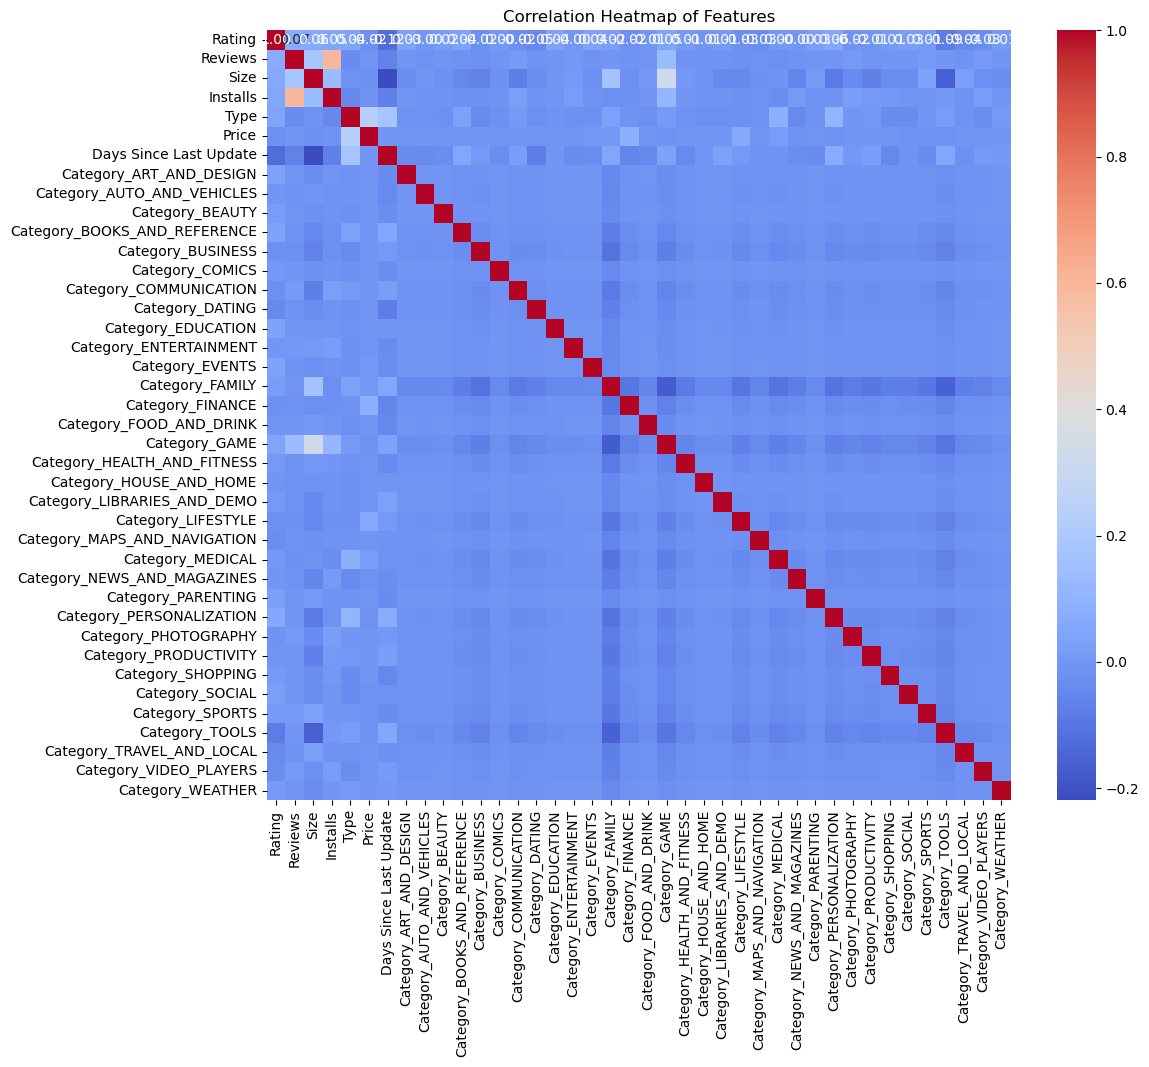

In [28]:
# 각 feature 간의 상관계수 계산
correlation_matrix = result_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression


# NaN 값을 가진 행을 제거합니다
result_df_cleaned = result_df.dropna(subset=['Rating'])

# features와 target을 지정합니다
X = result_df_cleaned.drop(['Rating'], axis=1)
y = result_df_cleaned['Rating']

# 데이터를 훈련 및 테스트 세트로 분할합니다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 선형 회귀 모델을 초기화하고 훈련 데이터에 모델을 적합시킵니다
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 생성합니다
Results = model.predict(X_test) 

In [37]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측을 생성합니다
y_pred = model.predict(X_test)

# 평균 제곱 오차를 계산합니다
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.017380487815626657


In [60]:
# 결측값이 있는 행과 없는 행 분리
data_with_rating = result_df.dropna(subset=['Rating'])
data_missing_rating = result_df[result_df['Rating'].isnull()]

# 결측값이 없는 데이터에서 특성과 타겟 분리
X_complete = data_with_rating.drop('Rating', axis=1)
y_complete = data_with_rating['Rating']

X_missing = data_missing_rating.drop('Rating', axis=1)

# predict null data : linear model
linear_model = LinearRegression()
linear_model.fit(X_complete, y_complete)
predicted_ratings = linear_model.predict(X_missing)

# fill the null data
result_df.loc[result_df['Rating'].isnull(), 'Rating'] = predicted_ratings

# Feature and Target Separation
X_filled = result_df.drop('Rating', axis=1)
y_filled = result_df['Rating']

# split dataset
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42)

# Random Forest model train
random_forest_model_filled = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model_filled.fit(X_train_filled, y_train_filled)

# 특성 중요도 추출
feature_importances_filled = pd.Series(random_forest_model_filled.feature_importances_, index=X_filled.columns).sort_values(ascending=False)
print(feature_importances_filled)

Days Since Last Update          0.262156
Size                            0.218049
Reviews                         0.190818
Installs                        0.087877
Category_FAMILY                 0.018317
Price                           0.017800
Category_LIFESTYLE              0.014316
Category_TOOLS                  0.014226
Category_HEALTH_AND_FITNESS     0.011752
Category_MEDICAL                0.011148
Category_FINANCE                0.010325
Category_BUSINESS               0.010324
Category_GAME                   0.010308
Category_DATING                 0.010034
Category_PHOTOGRAPHY            0.008638
Category_COMMUNICATION          0.008258
Category_PRODUCTIVITY           0.008036
Category_NEWS_AND_MAGAZINES     0.007993
Category_SPORTS                 0.006863
Category_VIDEO_PLAYERS          0.006810
Category_PERSONALIZATION        0.006698
Category_BOOKS_AND_REFERENCE    0.006434
Category_FOOD_AND_DRINK         0.006021
Category_TRAVEL_AND_LOCAL       0.005770
Type            

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# declare target 
X = result_df.drop('Rating', axis=1)
y = result_df['Rating']

# replace null to median
y = y.fillna(y.median())

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# extract importance features
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Days Since Last Update          0.260493
Size                            0.221158
Reviews                         0.191519
Installs                        0.090364
Category_FAMILY                 0.019061
Price                           0.017598
Category_LIFESTYLE              0.015229
Category_TOOLS                  0.013979
Category_MEDICAL                0.011702
Category_HEALTH_AND_FITNESS     0.011652
Category_FINANCE                0.011026
Category_BUSINESS               0.010110
Category_DATING                 0.009271
Category_GAME                   0.009163
Category_PHOTOGRAPHY            0.008651
Category_PRODUCTIVITY           0.007968
Category_NEWS_AND_MAGAZINES     0.007905
Category_COMMUNICATION          0.007611
Category_SPORTS                 0.007078
Category_VIDEO_PLAYERS          0.006582
Category_FOOD_AND_DRINK         0.006205
Category_PERSONALIZATION        0.006082
Category_BOOKS_AND_REFERENCE    0.005803
Category_TRAVEL_AND_LOCAL       0.005353
Category_MAPS_AN

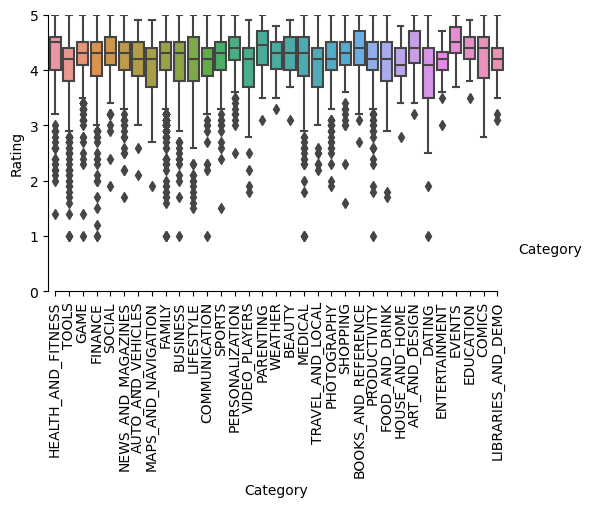

In [52]:
# catplot 생성
g = sns.catplot(x="Category", y="Rating", height=3.5, aspect=1.5, kind="box", legend=False, data=unique_df)

# 범례 추가
g.add_legend(title="Category")

# 축 라벨 설정
g.set_axis_labels("Category", "Rating")

# y 축 제한 설정
g.set(ylim=(0, 5))

# 축 꾸미기
g.despine(trim=True)

# 그래프 크기 설정
g.fig.set_size_inches(6.5, 3.5)

# y 축 라벨 회전
plt.xticks(rotation=90)

# 그래프 보여주기
plt.show()

Text(0.5, 1.0, 'Category')

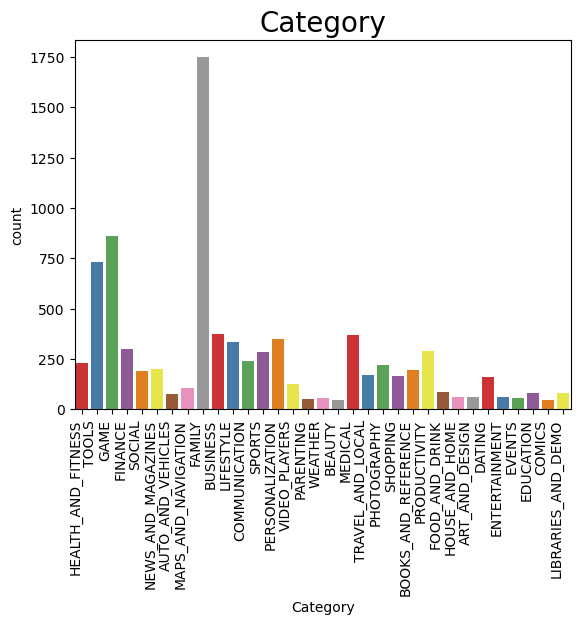

In [53]:
g = sns.countplot(x="Category", data=unique_df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Category',size = 20)

C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

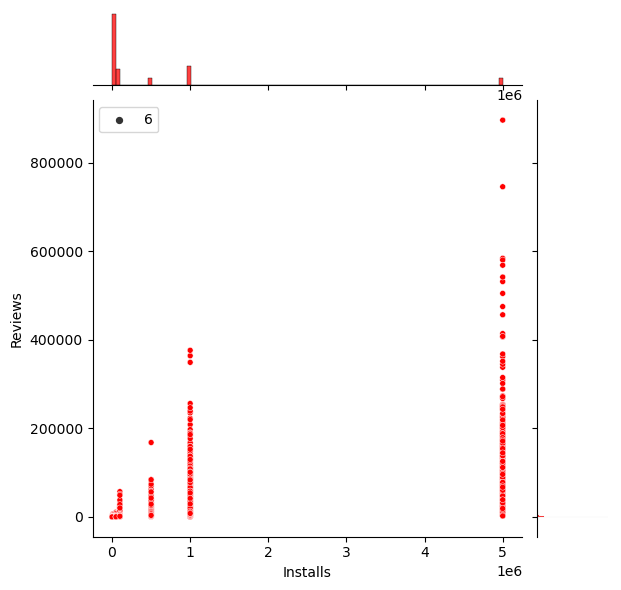

In [54]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Reviews",color = 'red', data=unique_df[unique_df['Installs']<10000000], size = 6)

C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MZ02-JULEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

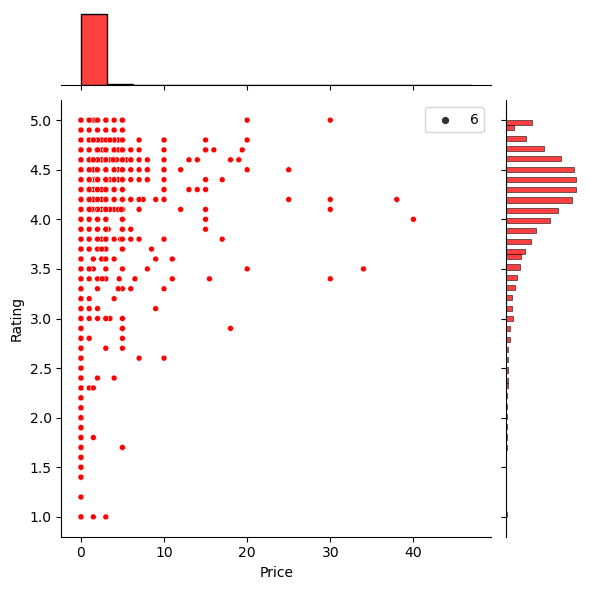

In [55]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Price", y="Rating",color = 'red', data=unique_df[unique_df['Price']<50], size = 6)
#g.set(xlim=(0, 5))

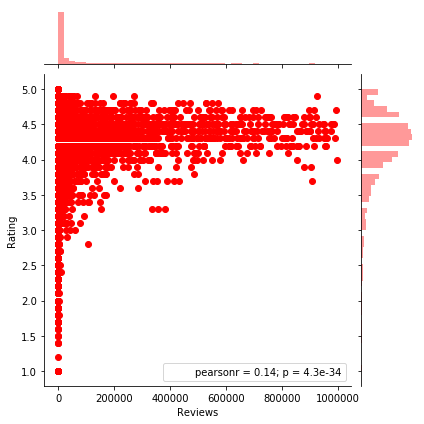

In [31]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'red', data=df2[df2['Reviews']<1000000], size = 6)

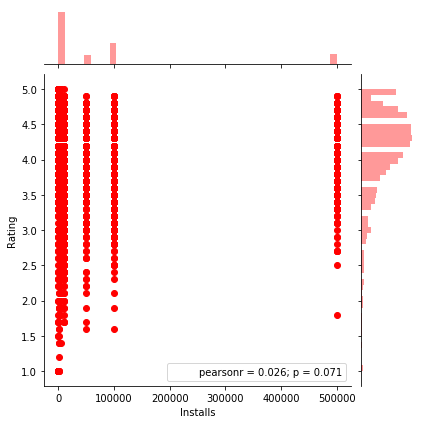

In [66]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Reviews",color = 'red', data=df2[df2['Installs']<1000000], size = 6)